# Subspace by Grow90

## Putting Sms Into Work

### You need to analyse the sms data and answer the following questions:

1. We have intentionally added a small bug in this code. Your task will be to make this code work. (20 Marks - 20 mins)
2. Classify sensitive SMSs (Like OTP SMSs, SMSs leaking Personal Information, NSFW SMSs, Sexual SMSs, Political SMSs). (80 Marks - 80 mins)

Submit your final code ipynb file here -> 
[https://forms.gle/MgqijdeQiZLABCKa6](https://forms.gle/MgqijdeQiZLABCKa6)

DeadLine: 11 March 2022

In case you face any issue, feel free to mail me at joeydash@subspace.money


## Installs and Imports

In [ ]:
from google.colab import output
!pip install price_parser
output.clear()

In [ ]:
import json
import pandas as pd
from datetime import datetime
import random
import os
from price_parser import parse_price
import numpy as np
import datetime
from pandas.io.json import json_normalize #package for flattening json in pandas df
output.clear()

In [ ]:
# function to seed everything
# reference https://www.kaggle.com/rhythmcam/random-seed-everything
SEED = 42

def seedBasic(seed=SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seedBasic(SEED)

In [ ]:
!wget https://cdn.subspace.money/data.zip
output.clear()

In [ ]:
data = pd.read_pickle("data.zip")

In [ ]:
data.shape

In [ ]:
data.head()

,id,user_id,message,msg_time
0,a0da0b21-545f-4fae-9142-a6a8600c6d75,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:15:14.920
1,0b1033ce-e8ba-4dd5-b698-e392196deff5,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,Your VPA Shriky@dbs linked to DBS Bank India L...,2021-11-01 00:15:14.688
2,9ba69d01-1040-47f1-af9f-4724ac97e037,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:14:32.031
3,51a6ba2a-5ba4-4e8e-81e3-c075d59f2450,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,Your VPA Shriky@dbs linked to DBS Bank India L...,2021-11-01 00:14:22.340
4,82053dbf-cf55-48ce-bae2-78656480387a,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:13:56.391


## Data Cleaning


---
#### Since for all the `3 Tasks` ,we need to use the same dataframe. So lets do data cleaning before hand.

1. Lets convert **`Timestamp`** into useful Data namely **`date`  `month`  `year`**.
2. Lets remove some unnecessary info like **`Account number` , `OTP` , `Ref Id`** from the messages.
3. For parsing out money easily we need to do some transformations. (eg **`Rs.320`** ------>**`Rs 320`**)


In [ ]:
df = data.copy()

In [ ]:
# Data cleaning-1
def date(df):
    df['Date']=pd.to_datetime(df['msg_time'])
    df['Year']=df.Date.dt.year
    df['Month']=df.Date.dt.month
    df['day']=df.Date.dt.day

In [ ]:
# Date Month Year appeneded to the dataframe
date(df)

In [ ]:
df.head(3)

,id,user_id,message,msg_time,Date,Year,Month,day
0,a0da0b21-545f-4fae-9142-a6a8600c6d75,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:15:14.920,2021-11-01 00:15:14.920,2021,11,1
1,0b1033ce-e8ba-4dd5-b698-e392196deff5,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,Your VPA Shriky@dbs linked to DBS Bank India L...,2021-11-01 00:15:14.688,2021-11-01 00:15:14.688,2021,11,1
2,9ba69d01-1040-47f1-af9f-4724ac97e037,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:14:32.031,2021-11-01 00:14:32.031,2021,11,1


In [ ]:
sentences = []
for i in df.message:
    sentences.append(str(i))

In [ ]:
sentences[:5]

['Dear Customer, your DBS account no ********7155 is credited with INR 1 on 01-11-2021 and is subject to clearance. Current Balance is INR 389065.68.',
 'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no. ******7155 is credited with ₹1.00 by shriky@apl (UPI Ref no 130500318699)',
 'Dear Customer, your DBS account no ********7155 is credited with INR 10 on 01-11-2021 and is subject to clearance. Current Balance is INR 389064.68.',
 'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no. ******7155 is credited with ₹10.00 by shriky@apl (UPI Ref no 130500234985)',
 'Dear Customer, your DBS account no ********7155 is credited with INR 25 on 01-11-2021 and is subject to clearance. Current Balance is INR 389054.68.']

In [ ]:
msg = sentences[1]
msg

'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no. ******7155 is credited with ₹1.00 by shriky@apl (UPI Ref no 130500318699)'

In [ ]:
msg.split()

['Your',
 'VPA',
 'Shriky@dbs',
 'linked',
 'to',
 'DBS',
 'Bank',
 'India',
 'Limited',
 'a/c',
 'no.',
 '******7155',
 'is',
 'credited',
 'with',
 '₹1.00',
 'by',
 'shriky@apl',
 '(UPI',
 'Ref',
 'no',
 '130500318699)']

In [ ]:
# for word in msg.split():
#     print(len(word))

In [ ]:
# Data cleaning-3
# cleaning messages

i=0
for msg in sentences:
    words=msg.split()
    j=0
    for word in words:
        # Lets convert Rs.XXX to Rs XXX
        if len(word) >= 3:
            if (word[0] == 'R') and (word[1] == 's') and (word[2] == '.'):
                word_rep = word.replace(word[2],' ',1)
                sentences[i] = msg.replace(word,word_rep)
                # print(sentences[i])
                # print(debited_msgs[i]) # the list 'sentences' has the updated values
                
        j+=1
    i+=1

In [ ]:
i, j, df.shape[0] # ofc they are matching, serves as good sanity check

(3152964, 22, 3152964)

In [ ]:
sentences_for_saving_1 = sentences.copy() # so I will restart from here later
# ran this once, so I will take its use later

In [ ]:
sentences = sentences_for_saving_1.copy()

In [ ]:
# for word in words:
#     print(word, len(word), word[0])

In [ ]:
# Data cleaning-2 
i=0
for msg in sentences:
    words = msg.split()
    j=0
    for word in words:
        word_len = len(words) # should have been named as sentence_len

        # Lets remove keyword like account number as parse_price gets confused.
        # like XXXXXXX1234 is going to be removed
        # add case when word is only 'X', like in Class X
        # Add another case when account number is shown by ******1234 instead of XXXXXXX1234
        ways_to_write_stars = ['XXX', 'xxx', '***']

        if any(ext in word for ext in ways_to_write_stars):
            sentences[i] = msg.replace(word,'')

        # if any(ext in word for ext in ways_to_write_stars):
        #     # if [k for k in ways_to_write_stars if k in word] :
        #     # print(word)
        #     sentences[i] = msg.replace(word,'')


        # if (len(word) > 1) and (word[0] in ways_to_write_stars) and (word[1] == word[0]):
        #     sentences[i] = msg.replace(word,'')
            

        # If card ending with xxxx present remove card no. 
        # Add the case when the message ends with the word 'card' otherwise will give errors
        # length starts from 1, but j starts from 0
        if (word in ['card', 'Card', 'CARD']) and (j != word_len-1):
            if msg.split()[j+1] == 'ending':
                sentences[i] = msg.replace(msg.split()[j+2],'',1)
        

        # To remove Reference ID from Messages
        # Some messages have used 'Reference no' instead of 'Reference ID'
        # add the case when sentence ends with 'Reference' only
        # similarly with Ref. and Spay
        # Some UPI reference numbers will also have to be taken
        # some messages have the names starting with 'Order'
        ways_to_write_reference = ['Reference', 'Ref.', 'ref', 'Ref', 'order', 'Order']
        ways_to_write_number = ['No', 'No.', 'no', 'no.', 'id', 'ID', 'number', 'Number', 'num', '#']
        

        if (word in ways_to_write_reference) and (j != word_len-1) and (j != word_len-2): # replace these 2 conditions with j < (word_len-2)
            if msg.split()[j+1] in ways_to_write_number:
                sentences[i] = msg.replace(msg.split()[j+2],'',1)

        # if (word  in ['Ref.') and (j != word_len-1):
        #     if (msg.split()[j+1] =='No.') or (msg.split()[j+1] in ways_to_write_number):
        #         sentences[i] = msg.replace(msg.split()[j+2],'',1)

        if (word == 'Spay') and (j != word_len-1):
            if (msg.split()[j+1] in ways_to_write_number):
                sentences[i] = msg.replace(msg.split()[j+1],'',1)


        # Remove OTP from Messages
        # sometimes there is no 'is'. sentences can be directly: 'Use OTP 12345'
        # sentences may also be 'OTP is ...',
        if word == 'OTP':
            if msg.split()[j-1] == 'is': # '1234 is OTP'
                sentences[i]=msg.replace(msg.split()[j-2],'',1)

            if j != word_len-1 : # if OTP is not the last word of sentence
                if msg.split()[j+1] in ['is', 'is:']: # 'OTP is 1234' or 'OTP is: 1234'
                    sentences[i]=msg.replace(msg.split()[j+2],'',1)

                elif msg.split()[j+1][0] in ['0','1','2','3','4','5','6','7','8','9']: # 'OTP 1234'
                    sentences[i]=msg.replace(msg.split()[j+1],'',1)

        # If card is declined we dont need that amount in credit or debit. Thus msg is removed.
        if word=='declined':
                sentences[i]=msg.replace(msg,'NULL_DECLN')
        
        # Lets convert Rs.XXX to Rs XXX
        if len(word)>=3:
              if word[0]=='R' and word[1]=='s' and word[2]=='.':
                word_rep=word.replace(word[2],' ',1)
                sentences[i]=msg.replace(word,word_rep)
                #print(debited_msgs[i])
                
        j+=1
    i+=1
    # if i == 3000: break

print('ran successfully!')

ran successfully!


In [ ]:
i

3152964

In [ ]:
sentences[i-1]

'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no. ******7155 is credited with ₹10.00 by shriky@apl (UPI Ref no '

In [ ]:
sentences_for_saving_2 = sentences.copy()

In [ ]:
sentences = sentences_for_saving_2.copy()

In [ ]:
import gc
gc.collect()

300

for some funny reason, there are account numbers left in the messages. I tried hard but it did not clean them up with the cell big cell above. So I am running a similar thing below specifically to remove account numbers!

In [ ]:
ss = sentences.copy()

In [ ]:
ways_to_write_stars = ['XXX', 'xxx', '***', '#', '##']

msg_counter = 0
for msg in ss:
    msg_sp = msg.split()
    for word in msg_sp:
        if any(ext in word for ext in ways_to_write_stars):
            ss[msg_counter] = msg.replace(word,'')
    msg_counter +=1

In [ ]:
ss[:10]

['Dear Customer, your DBS account no  is credited with INR 1 on 01-11-2021 and is subject to clearance. Current Balance is INR 389065.68.',
 'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹1.00 by shriky@apl (UPI Ref no ',
 'Dear Customer, your DBS account no  is credited with INR 10 on 01-11-2021 and is subject to clearance. Current Balance is INR 389064.68.',
 'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹10.00 by shriky@apl (UPI Ref no ',
 'Dear Customer, your DBS account no  is credited with INR 25 on 01-11-2021 and is subject to clearance. Current Balance is INR 389054.68.',
 'Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹25.00 by shriky@apl (UPI Ref no ',
 'Your Swiggy order from Instamart order  was delivered. Keep ordering from Instamart :)',
 'Your Swiggy order from Instamart order  is scheduled to be delivered between 11:00 PM - 12:00 AM, today.',
 'Your Swiggy order from Ins

Used these little checks when removing errors :)

In [ ]:
# print(i)
# print(sentences[i-1], sentences[i], sentences[i+1])
# this_sent = sentences[i]
# this_sent  = this_sent.split()
# for word in this_sent:
#     print(word)

In [ ]:
# this_sent

In [ ]:
sentences = ss.copy()

In [ ]:
# Use this cell to view first n clean messages
n_msg = 20
for msg in sentences[1:n_msg]:
    print(msg,'\n**********************************************************')

Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹1.00 by shriky@apl (UPI Ref no  
**********************************************************
Dear Customer, your DBS account no  is credited with INR 10 on 01-11-2021 and is subject to clearance. Current Balance is INR 389064.68. 
**********************************************************
Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹10.00 by shriky@apl (UPI Ref no  
**********************************************************
Dear Customer, your DBS account no  is credited with INR 25 on 01-11-2021 and is subject to clearance. Current Balance is INR 389054.68. 
**********************************************************
Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹25.00 by shriky@apl (UPI Ref no  
**********************************************************
Your Swiggy order from Instamart order  was delivered. Keep ordering from Instamart :) 


In [ ]:
# appending all clean messages to dataframe
df['message_c'] = sentences
df.sample(5)

,id,user_id,message,msg_time,Date,Year,Month,day,message_c
2446651,744b98fe-dc2c-40c3-9611-9840d110b0e0,bc65e1f8-ddff-442f-96f3-4ecdb6e3f86f,Join the fight against COVID-19. Contribute an...,2020-04-08 04:04:12.395,2020-04-08 04:04:12.395,2020,4,8,Join the fight against COVID-19. Contribute an...
2295774,ccf8986a-9dc2-4b0f-9a61-274c75403b2b,db3c53ba-8218-4708-8e91-005b4ff53bce,Hey! Now experience superior indoor coverage w...,2020-03-01 12:47:17.384,2020-03-01 12:47:17.384,2020,3,1,Hey! Now experience superior indoor coverage w...
2533418,9274f86e-28e8-48cf-abb5-ebf4adce5a4d,44041ade-0f4e-4905-942f-9bceccb56328,Your a/c XX1385 is debited on 30/05/2017 by IN...,2017-05-30 13:40:53.946,2017-05-30 13:40:53.946,2017,5,30,Your a/c XX1385 is debited on 30/05/2017 by IN...
470915,13a13e9d-15af-49fe-90f3-02620772c049,c149905c-b5af-4b80-97af-8fdda2bee677,"Hello, you have initiated the process of addin...",2021-06-20 01:02:20.511,2021-06-20 01:02:20.511,2021,6,20,"Hello, you have initiated the process of addin..."
1118479,e8c4c50c-5b76-4ba8-8d21-37d97c581df3,55b083bf-57e4-4c66-8669-3730b2c3316d,14-Nov-21 16:38 నాటికి 100% రోజువారీ 1.50 GB డ...,2021-11-14 16:38:35.791,2021-11-14 16:38:35.791,2021,11,14,14-Nov-21 16:38 నాటికి 100% రోజువారీ 1.50 GB డ...


## Reference 1

In [ ]:
# filter out transactional messages(10 pts)
# Hint: Filter messages based on keywords
# .*spent.*
# .*debited.*
# .*charged.*
# .*paid.*
# .*sent.*
# .*txn.*
# .*billed.*
# .*transaction.*

In [ ]:
# added some more keywords  
keywords=['spent','debited','charged','paid','txn','billed','transaction','credited', 'a/c', 'account', 'INR', 'Rs', '₹']
labels=[]
for sentence in sentences:
    words=sentence.split()
    flag=0
    for word in words:
        word=word.lower()
        if word in keywords:
            labels.append(1)
            flag=1
            break
    if flag==0:
        labels.append(0)

In [ ]:
# TO see how GOOD our keywords are:
rand=random.sample(range(1,10),5)
for i in rand: 
    print(sentences[i],'\n\nIs TransactionalMessage:',labels[i],'\n********************************************************\n')

Dear Customer, your DBS account no  is credited with INR 10 on 01-11-2021 and is subject to clearance. Current Balance is INR 389064.68. 

Is TransactionalMessage: 1 
********************************************************

Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹1.00 by shriky@apl (UPI Ref no  

Is TransactionalMessage: 1 
********************************************************

Your Swiggy order from Instamart order  was delivered. Keep ordering from Instamart :) 

Is TransactionalMessage: 0 
********************************************************

Your VPA Shriky@dbs linked to DBS Bank India Limited a/c no.  is credited with ₹10.00 by shriky@apl (UPI Ref no  

Is TransactionalMessage: 1 
********************************************************

₹15,250/- Diwali bonus is waiting for you! Register on Gamezy Rummy today and get a welcome bonus on first deposit.

Download the app now,
https://1mm.in/RummyG 

Is TransactionalMessage: 0 
********

In [ ]:
df['Is_Transactional_Msg'] = labels;

In [ ]:
df.sample(5)

,id,user_id,message,msg_time,Date,Year,Month,day,message_c,Is_Transactional_Msg
2499564,ec5e1e76-1fd4-4161-835a-c902cf8d5b5f,15a05f19-4750-4dbe-b8ec-3ca432c6fb8d,In the current situation our contact centres a...,2020-03-25 17:23:58.606,2020-03-25 17:23:58.606,2020,3,25,In the current situation our contact centres a...,0
1807074,9dbd51cd-96ba-4447-bdf2-cbf23655f6ba,c5229c05-c89a-4d1c-8615-e5e07288594e,Please book ticket for your children of above ...,2021-11-22 17:54:31.664,2021-11-22 17:54:31.664,2021,11,22,Please book ticket for your children of above ...,0
161732,a82eb8cb-ab00-42c4-acd2-56b5ffeb38c9,94ac3564-eaff-4380-a123-3904909adb90,HDFC Bank: Rs 105.00 debited from a/c **2909 o...,2021-12-24 13:40:37.353,2021-12-24 13:40:37.353,2021,12,24,HDFC Bank: Rs 105.00 debited from a/c **2909 o...,1
1830231,bb1fb173-085f-4c7a-a558-8c424ac016ab,11e2066b-605b-4203-a516-4db0af78882e,Tera Kal maths ka quiz h kya?,2020-09-04 00:58:34.722,2020-09-04 00:58:34.722,2020,9,4,Tera Kal maths ka quiz h kya?,0
1910378,80fa69c8-fc2a-43b3-866a-7975c3a0ed71,a73af09b-0d1d-456c-b7ec-e67599f4877f,Your plan for Jio no 7977254056 expires on 22-...,2021-06-20 10:02:48.910,2021-06-20 10:02:48.910,2021,6,20,Your plan for Jio no 7977254056 expires on 22-...,0


## Reference 2

In [ ]:
# His expense and earning for a particular month? (40 pts)
# Hint: Use https://duckling.wit.ai/ for parsing money
# Find out total money credited and total money debited

### Part-1:Debited

In [ ]:
#To see total credited and debited amount.
#Its enough to use only transactional messages of the customer. Thus lets take transactional messages into a new dataframe df_t
df_t=df[df.Is_Transactional_Msg==1]
df_t.shape

(583413, 10)

In [ ]:
df_t.head(3)

,id,user_id,message,msg_time,Date,Year,Month,day,message_c,Is_Transactional_Msg
0,a0da0b21-545f-4fae-9142-a6a8600c6d75,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:15:14.920,2021-11-01 00:15:14.920,2021,11,1,"Dear Customer, your DBS account no is credite...",1
1,0b1033ce-e8ba-4dd5-b698-e392196deff5,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,Your VPA Shriky@dbs linked to DBS Bank India L...,2021-11-01 00:15:14.688,2021-11-01 00:15:14.688,2021,11,1,Your VPA Shriky@dbs linked to DBS Bank India L...,1
2,9ba69d01-1040-47f1-af9f-4724ac97e037,e0965ef6-b2f8-4f4c-ace1-1a0a4365b25d,"Dear Customer, your DBS account no ********715...",2021-11-01 00:14:32.031,2021-11-01 00:14:32.031,2021,11,1,"Dear Customer, your DBS account no is credite...",1


In [ ]:
df_t.Year.value_counts()
# 2021 has the most messages. Looks like Grow90 has grown the most in the past 2 years?!

2021    278528
2020    119145
2019     82956
2022     65948
2018     24105
2017     10565
2016      1742
2015       394
2014        19
2002         9
2013         2
Name: Year, dtype: int64

In [ ]:
df_t.Month.value_counts()
# October to Feb have the most messages. Holiday season perhaps?

12    71449
1     67904
11    62707
10    60178
2     55003
9     48957
8     46119
7     41110
3     38259
6     33235
5     29715
4     28777
Name: Month, dtype: int64

Since we have been asked to do it for a month lets do for  Month=**`March`** or **`(3)`**

In [ ]:
month_debt = 3
df_t = df[df.Is_Transactional_Msg==1]
df_t = df_t[df.Month==month_debt]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sentences_t = []
for i in df_t.message_c:
    sentences_t.append(str(i))
len(sentences_t)

38259

In [ ]:
# Function is written to count no of ones and zeros present in the array a.
# This function is useful below to see how many transactional_msgs contain info about credit/debit.
def count_zo(arr):
    z=0
    o=0
    for i in arr:
        if i==0:
            z+=1
        else:
            o+=1
    print("Zeros:",z,' | Ones:',o)

In [ ]:
keywords_t = ['debited','spent']
debt =[]
for sentence in sentences_t:
    words=sentence.split()
    flag=0
    for word in words:
        word=word.lower()
        if word in keywords_t:
            debt.append(1)
            flag=1
            break
    if flag==0:
        debt.append(0)
print('No of Is_debited :-\n----------------------')
count_zo(debt)

No of Is_debited :-
----------------------
Zeros: 24976  | Ones: 13283


In [ ]:
df_t['Is_Debited']=debt
df_debited=df_t[df_t.Is_Debited==1]

In [ ]:
debited_msgs=[]
for i in df_debited.message_c:
    debited_msgs.append(str(i))

In [ ]:
# Using parse_price for parsing price from text
# This is how price_parser works
print(debited_msgs[1])
p=parse_price(debited_msgs[1])
print('\n************************\nAmt:',p.amount_text,'| Currency:',p.currency,'\n************************')
p

Your A/C No  has been Successfully Debited by Rs  234.54 on 25/03/2021 20:15:52 with UPI Ref. No: 108416745188.-MAHABANK

************************
Amt: 234.54 | Currency: Rs 
************************


Price(amount=Decimal('234.54'), currency='Rs')

In [ ]:
total_debt = 0.0
for msg in debited_msgs:
    price=parse_price(msg)
    if price.currency!=None:
        if price.currency=='INR' or price.currency=='Rs':
            amt = price.amount_text.replace(',','')
            # add the case when amount is '600.00.', So we remove the trailing fullstop
            # amt = amt.rstrip('.')
            amt = amt.strip().rstrip('.').split()[0]
            total_debt += float(amt)

datetime_object = datetime.datetime.strptime(str(month_debt), "%m")
month_name_debt = datetime_object.strftime("%B")
print('Total Debited Amt in {}: Rs {:.2f}'.format(month_name_debt,total_debt))

Total Debited Amt in March: Rs 2991375914401.19


### Part-2 :- Credited

In [ ]:
month_cred=7
df_t=df[df.Is_Transactional_Msg==1]
df_t=df_t[df.Month==month_cred]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sentences_t=[]
for i in df_t.message_c:
    sentences_t.append(str(i))
len(sentences_t)

41110

In [ ]:
keywords_c=['credited','refund']
cred=[]
cred_s=[]
for sentence in sentences_t:
    words=sentence.split()
    flag=0
    for word in words:
        word=word.lower()
        if word in keywords_c:
            cred_s.append(sentence)
            cred.append(1)
            flag=1
            break
    if flag==0:
        cred.append(0)
print('No of Is_credited :-\n----------------------')
count_zo(cred)

No of Is_credited :-
----------------------
Zeros: 33076  | Ones: 8034


In [ ]:
df_t['Is_Credited']=cred
df_credited=df_t[df_t.Is_Credited==1]

In [ ]:
credited_msgs=[]
for i in df_credited.message_c:
    credited_msgs.append(str(i))

In [ ]:
total_credt = 0.0
for msg in credited_msgs:
    price=parse_price(msg)
    if price.currency!=None:
        if price.currency=='INR' or price.currency=='Rs':
            amt=price.amount_text.replace(',','')
            # add the case when amount is '600.00.', So we remove the trailing fullstop
            amt = amt.strip().rstrip('.').split()[0]
            
            try: total_credt+=float(amt)
            except: print(amt) # one wierd value is skipped

datetime_object = datetime.datetime.strptime(str(month_cred), "%m")
month_name_cred = datetime_object.strftime("%B")
print('Total Credited Amt in {}: {:.2f}'.format(month_name_cred,total_credt))

00....688
Total Credited Amt in July: 334873855966642944.00


## Reference 3


---
1. Did Data analysis about monthly expenditure.
2. Tried to find out how many times was a gateway used and how much amount was spent through each of them 
3. Used **`Plotly`**, a `high level api` for rapid figure generation.
4. These plots are **interactive**:
    - Allow you to **zoom** into particular place thru **box** or **lasso** select
    - You can click on any particular data in legend to remove that information from the plot.
    - You can **hover** on it to see the value of the data.
    - You can **download** these as png

In [ ]:
# Any Extra insights (60 pts)
# https://arxiv.org/pdf/2002.02755.pdf
# https://www.analyticsvidhya.com/blog/2020/07/machine-learning-study-clustering-transactions-text-descriptions/
# https://hasgeek.com/fifthelephant/2017/sub/designing-machine-learning-pipelines-for-mining-tr-HF2RRbi7nJ3qqXVJvEQnYy
# https://medium.com/analytics-vidhya/making-sms-useful-again-db94d92e3490

In [ ]:
keywords_graph=['ICICI','HDFC','AMEX','LazyPay','Canara','SBI','paytm','Amazon']
keywords_graph=[i.lower() for i in keywords_graph]

In [ ]:
df_graph=df[df.Is_Transactional_Msg==1]
sentences_g=[]
for i in df_graph.message_c:
    sentences_g.append(str(i))
len(sentences_g)

583413

In [ ]:
count_g=[0]*8
count_m=[0]*8
j=0
for sentence in sentences_g:
    for word in sentence.split():
        word=word.lower()
        if word in keywords_graph:
            if j!=180: # Same messages as 179
                for i in range(8):
                    if word==keywords_graph[i]:
                        count_g[i]+=1
                        price=parse_price(sentence)
                        try: 
                            amt=price.amount_text.replace(',','')
                            if amt[-1]=='.': amt=amt[:-1]
                            count_m[i]+=float(amt)

                        except: print(price, amt)


    j+=1

Price(amount=None, currency=None) 907874
Price(amount=Decimal('2032022'), currency=None) 02 03 2022
Price(amount=None, currency=None) 73.07
Price(amount=None, currency=None) 73.07
Price(amount=None, currency='FC') 1885.00
Price(amount=None, currency='FC') 160587
Price(amount=Decimal('18602676161'), currency='FC') 1860 267 6161
Price(amount=None, currency=None) 1860 267 6161
Price(amount=Decimal('5.2021'), currency=None) 05 2021
Price(amount=None, currency=None) 766447
Price(amount=None, currency=None) 448
Price(amount=None, currency=None) 448
Price(amount=None, currency=None) 77
Price(amount=None, currency=None) 140
Price(amount=None, currency=None) 100
Price(amount=None, currency=None) 20
Price(amount=None, currency=None) 20
Price(amount=None, currency=None) 20
Price(amount=None, currency=None) 20
Price(amount=None, currency=None) 223.00
Price(amount=None, currency=None) 223.00
Price(amount=None, currency=None) 223.00
Price(amount=None, currency=None) 4000.00
Price(amount=None, curren

we will need further processing about why and where are the amounts/currency is being none. One observation can be done for sure, that the existing code to extract amount is not comprehensive enough. Observe how sometimes it picks up dates like 04 02 2022!

In [ ]:
count_m=[float(str(round(i, 2))) for i in count_m]
#count_g,count_m
keywords_graph=['ICICI','HDFC','AMEX','LazyPay','Canara Bank','SBI','Paytm','Amazon Pay']
df_g=pd.DataFrame({'gateway':keywords_graph,'Count':count_g})
df_m=pd.DataFrame({'gateway':keywords_graph,'Count':count_m})
df_g

,gateway,Count
0,ICICI,25996
1,HDFC,30377
2,AMEX,684
3,LazyPay,5749
4,Canara Bank,4062
5,SBI,30955
6,Paytm,63521
7,Amazon Pay,12166


Figure shows data for months from Feb to Sept


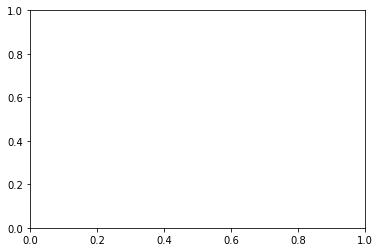

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

fig=px.bar(df_g,x='gateway',y="Count",title="No of times Payement gateway used",
       color="gateway",color_discrete_sequence=px.colors.qualitative.Plotly)
plt.xlabel('')
fig.update_layout(
    font_color="black",
    title_font_color="navy",
    title_x=0.5,
    title_font_size=25,
    font=dict(size=14)
)
fig.update_xaxes(title=None)
print('Figure shows data for months from Feb to Sept')
fig.show()

Figure shows data for months from Feb to Sept


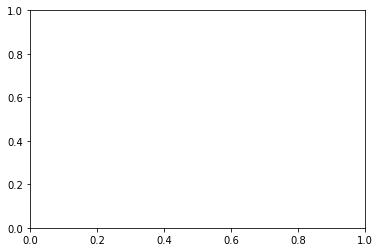

In [ ]:
fig=px.bar(df_m,x='gateway',y="Count",title="Amount thru each Payement gateway",
       color="gateway",color_discrete_sequence=px.colors.qualitative.G10)
plt.xlabel('')
fig.update_layout(
    font_color="black",
    title_font_color="darkorange",
    title_x=0.5,
    title_font_size=25,
    font=dict(size=14)
)
fig.update_xaxes(title=None)
print('Figure shows data for months from Feb to Sept')
fig.show()

In [ ]:
df_t=df[df.Is_Transactional_Msg==1]
month_val=df_t.Month.unique()
month_val.sort()
month_name=[]
monthly_exp=[]

for month_debt in month_val:
    df_t=df[df.Is_Transactional_Msg==1]
    df_t=df_t[df.Month==month_debt]
    sentences_t=[]
    for i in df_t.message_c:
        sentences_t.append(str(i))
    keywords_t=['debited','spent']
    debt=[]
    for sentence in sentences_t:
        words=sentence.split()
        flag=0
        for word in words:
            word=word.lower()
            if word in keywords_t:
                debt.append(1)
                flag=1
                break
        if flag==0:
            debt.append(0)
    df_t['Is_Debited']=debt
    df_debited=df_t[df_t.Is_Debited==1]
    debited_msgs=[]
    for i in df_debited.message_c:
        debited_msgs.append(str(i))
        
    total_debt = 0.0
    for msg in debited_msgs:
        price=parse_price(msg)
        if price.currency!=None:
            if price.currency=='INR' or price.currency=='Rs':
                try: 
                    amt=price.amount_text.replace(',','')
                    amt = amt.strip().rstrip('.').split()[0]
                    total_debt+=float(amt)
                except: print(amt)
                

    datetime_object = datetime.datetime.strptime(str(month_debt), "%m")
    month_name_debt = datetime_object.strftime("%B")
    #print('Total Debited Amt in {}: Rs {:.2f}'.format(month_name_debt,total_debt))
    month_name.append(month_name_debt)
    monthly_exp.append(round(total_debt,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



00....688
2703
31.05.2019
00....688
00....688
00....688
00....688


This shows 00.....688 is a wierd number. Will have to check later how it affects things. 31.05.2019 is a date, how did this come up here!? <br>
2703 can be amount or pin or some other number. It is unlikely to be an amount because otherwise similar more cases might have shown up. We can also safely ignore the 2703 value because it is not extremely large

In [ ]:
#month_name,monthly_exp
month_exp=pd.DataFrame({'Month':month_name,'Expenditure':monthly_exp})
month_exp

,Month,Expenditure
0,January,4.394190e+12
1,February,2.346699e+13
2,March,2.991376e+12
3,April,1.827439e+12
4,May,2.595715e+12
5,June,5.715829e+12
6,July,7.573174e+12
7,August,6.123550e+12
8,September,9.414566e+13
9,October,6.662188e+12


In [ ]:
fig=px.bar(month_exp,x='Month',y="Expenditure",title="Monthly Expenditure",
       color="Month",color_discrete_sequence=px.colors.qualitative.Dark2)
fig.update_layout(
    font_color="black",
    title_font_color="orangered",
    title_x=0.5,
    title_font_size=25,
    font=dict(size=14)
)
fig.update_xaxes(title=None)
fig.show()

## Reference Conclusions

---
Let's call the user as ABC.


1. ABC has receieved **`628`** transactional messages.
2. Total Debited Amount of ABC in March: **`Rs 89720.10`**
3. Total Credited Amount of ABC in July: **`Rs 48363.01`**
4. **Inferences** from plots:
    - ABC uses **Paytm** more frequently for payments of lower denomination as comapred to AmazonPay ,Lazypay ,ICICI ,HDFC ,SBI credit cards.
    - ABC Prefers to use **ICICI** and **SBI** for payements of higher denomination.
    - ABC has spent maximum near mid of the year namely **June** and **July**.

## Your Code Goes Here

### Try unsupervised clustering into 4 categories
I will use simple K-Means here. It can be a nice starting point. A lot of inspiration is from this ernel on [kaggle](https://www.kaggle.com/carlosaguayo/text-clustering-with-unsupervised-learning)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
texts = df['message_c']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

In [ ]:
n_clusters = 2
# I tried with 4 clusters but except one, all other clusters had similar data
# Having two is the best option!

In [ ]:
model = KMeans(n_clusters = n_clusters, 
               init = 'k-means++', # because k-means++ is said to be smart for picking initial points
               max_iter = 100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init = 3)  # Number of time the k-means algorithm will be run with different centroid seeds

model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=3)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1] # get the centers of our clusters
terms = vectorizer.get_feature_names_out()

In [ ]:
for i in range(n_clusters):
    print(f"Cluster {i}")
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Cluster 0
rs
airtel
00
otp
कर
https
upi
dear
bank
ly
Cluster 1
data
jio
plan
know
speed
quota
recharge
balance
internet
high


Seems decent
- Cluster 0 has financial messages like OTP, UPI etc.
- Cluster 1 has promotional messages about recharges and plans



In [ ]:
# let us check with a single example
texts[2090]

'Your UTS Mobile Ticketing password is 2540'

Alright, looks like a transaction-related thing to me

In [ ]:
this_ex = vectorizer.transform([texts[2090]])
cluster_this_ex = model.predict(this_ex)[0]
print('This text belongs to cluster number', cluster_this_ex)

This text belongs to cluster number 0


**Woohoo it works!**

#### Lets visualise this with a word cloud. Reference from [ here](https://www.geeksforgeeks.org/generating-word-cloud-in-python-set-2/)

In [ ]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
dct = {'c0': [], 'c1': []}

for i in range(n_clusters):
    print(f"Cluster {i}")
    for ind in order_centroids[i, :]:
        # print(terms[ind])
        dct['c'+ str(i)].append(terms[ind])

Cluster 0
Cluster 1


In [ ]:
dct['c0'][:10]

['rs', 'airtel', '00', 'otp', 'कर', 'https', 'upi', 'dear', 'bank', 'ly']

In [ ]:
c0 = " ".join(dct['c0'])
c1 = " ".join(dct['c1'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

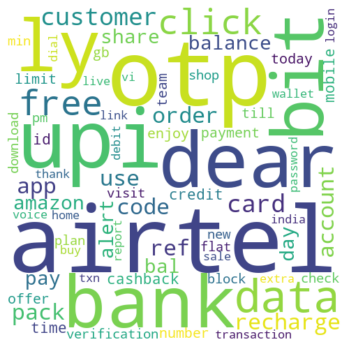

In [ ]:
wordcloud_c0 = WordCloud(width=480, height=480, max_words=70,background_color ='white').generate(c0)
plt.figure(figsize = [6,10] )
plt.imshow(wordcloud_c0, interpolation="bilinear")
plt.axis("off")
plt.show()

**Keywords: OTP, UPI, Bank, card...***

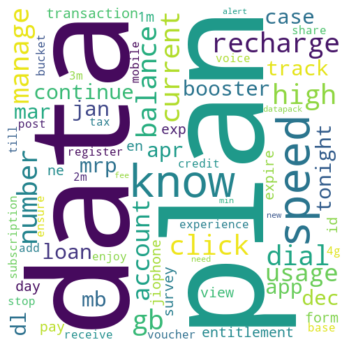

In [ ]:
wordcloud_c1 = WordCloud(width=480, height=480, max_words=70, background_color ='white').generate(c1)
 
plt.figure(figsize = [6,10] )
plt.imshow(wordcloud_c1, interpolation="bilinear")
plt.axis("off")
plt.show()

**Keywords: Data, Plan, balance...**

### **Clearly this was a nice way to start without much hassle.** Kmeans is smart enough to understand which messages are sensitive (like OTP and bank details) and which is promotional or general message

# Approach 2 (fail)
### Use proper NLP tools this time

ref from - https://maxhalford.github.io/blog/unsupervised-text-classification/

I will try to clean the words even more, and then cluster. Spacy to the rescue!

In [ ]:
# import string

# def clean_text(text):
#     text = text.lower()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     text = text.replace('\n', ' ')
#     text = ' '.join(text.split())  # remove multiple whitespaces
#     return text

# for i,j in enumerate(df['message_c']):
#     # print(i,j)
#     df.loc[i, 'message_c_more'] = clean_text(j)

The following cell took a lot of time to run. Only cleaned about 40,000 sentences in 40 minutes! Clearly there should be a better way to proceed. Most likely because operations in pure python using strings are slow!

---



In [ ]:
# !python -m spacy download en_core_web_md --quiet
# # I am using the medium-size one

In [ ]:
# # import spacy
# # nlp = spacy.load('en_core_web_md')
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [ ]:
# def embed(tokens, nlp):
#     """Return the centroid of the embeddings for the given tokens.

#     Out-of-vocabulary tokens are cast aside. Stop words are also
#     discarded. An array of 0s is returned if none of the tokens
#     are valid.

#     """

#     lexemes = (nlp.vocab[token] for token in tokens)

#     vectors = np.asarray([
#         lexeme.vector
#         for lexeme in lexemes
#         if lexeme.has_vector
#         and not lexeme.is_stop
#         and len(lexeme.text) > 1
#     ])

#     if len(vectors) > 0:
#         centroid = vectors.mean(axis=0)
#     else:
#         width = nlp.meta['vectors']['width']  # typically 300
#         centroid = np.zeros(width)

#     return centroid

In [ ]:
# doc = df['message_c'][200]
# doc

In [ ]:
# tokens = doc.split(' ')
# centroid = embed(tokens, nlp)
# centroid.shape, centroid

# okay, this did not work out. I gave time but could not understand why. Lets try another method
Now I am following what is given here https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d <br>
It is again K-means only, but with cleaner text

In [ ]:
# #Text pre-processing
# """removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')

In [ ]:
# import string
# def text_process(text):
#     '''
#     Takes in a string of text, then performs the following:
#     1. Remove all punctuation
#     2. Remove all stopwords
#     3. Return the cleaned text as a list of words
#     4. Remove words
#     '''
#     stemmer = WordNetLemmatizer()
#     nopunc = [char for char in text if char not in string.punctuation]
#     nopunc = ''.join([i for i in nopunc if not i.isdigit()])
#     nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
#     return [stemmer.lemmatize(word) for word in nopunc]

# #testing the function with a sample text#
# sample_text = "Hey There! This is a Sample review, which 123happens {blah}%456 to contain happened punctuations universal rights of right contained."
# print(text_process(sample_text))

In [ ]:
# texts = df['message_c']
# texts[300], text_process(texts[300])

In [ ]:
# cleaned_text = []
# for i in texts:
#     cleaned_text.append(text_process(i))
# very slow, same reason

In [ ]:
# df['message_c_v2'] = df['message_c'].apply(lambda x: text_process(x))
# also very slow

# Try to visualise embeddings using umap - failed!

In [ ]:
# !pip install umap-learn --quiet

In [ ]:
# !pip install umap-learn[plot] --quiet

In [ ]:
# import umap
# import umap.plot

In [ ]:
# vectorizer = CountVectorizer(min_df = 10, stop_words = 'english') # ignore words wit frequesncy less than 10

In [ ]:
# cleaner = df['message_c'].dropna()

In [ ]:
# word_matrix = vectorizer.fit_transform(cleaner)

In [ ]:
# embedding = umap.UMAP(n_components = 2, metric = 'cosine').fit(word_matrix)
# f = umap.plot.points(embedding)
# error: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled

now apply tfidf vectorizer

In [ ]:
# vectorizer_2 = CountVectorizer(min_df = 10, stop_words = 'english')
# word_matrix_2 = vectorizer_2.fit_transform(cleaner)
# embedding_2 = umap.UMAP(n_components = 2, metric = 'cosine').fit(word_matrix_2)
# f = umap.plot.points(embedding_2)

# Approch 3
### Simply check if a given substring is present in the message or not. Use this for classification. No ML here

In [ ]:
sensitive_messages_words = ['OTP', 'Password', 'password', 'pin', 'Pin', 'Card', 'card', 'CARD']
reference_words  =['Reference', 'Ref.', 'ref', 'Ref', 'order', 'Order']
toxic_words = []
card_declined = ['NULL_DECLN']

In [ ]:
# failed attempts to get positive and negative words directly
# so left this method altogether
# even worse, how can list out all categories and their keywords explicitly!

# https://github.com/shekhargulati/sentiment-analysis-python/tree/master/opinion-lexicon-English
# !npx degit shekhargulati/sentiment-analysis-python/tree/master/opinion-lexicon-English -f

# Approach 4 (finally success!)
Using LDA for topic modelling. Reference from here https://www.kaggle.com/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn

In [ ]:
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
# downloading stopwords, punctuations etc.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#stop-words
stop_words = set(nltk.corpus.stopwords.words('english'))

In [ ]:
data = df.copy()
data = data[['message_c']]

**For now, I am using 100,000 random samples only because training and cleaning takes time**

In [ ]:
data = data.sample(n = 100000, random_state =data.shap 42) # remove this cell later

In [ ]:
def clean_text(headline):
  le = WordNetLemmatizer()
  word_tokens = word_tokenize(headline)
  tokens = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text = " ".join(tokens)
  return cleaned_text

In [ ]:
# time-taking process. So for now I am using only 10,000 samples
data['clean'] = data['message_c'].apply(clean_text)

In [ ]:
data.head()

,message_c,clean
2446651,Join the fight against COVID-19. Contribute an...,Join fight COVID-19 Contribute support need he...
2295774,Hey! Now experience superior indoor coverage w...,experience superior indoor coverage Airtel Wi-...
2533418,Your a/c XX1385 is debited on 30/05/2017 by IN...,Your XX1385 debited 30/05/2017 70.00 towards P...
470915,"Hello, you have initiated the process of addin...",Hello initiated process adding Axis Bank account
1118479,14-Nov-21 16:38 నాటికి 100% రోజువారీ 1.50 GB డ...,14-Nov-21 16:38 నాటికి రోజువారీ 1.50 డేటా కోటా...


In [ ]:
data.drop(['message_c'],axis=1,inplace=True)

In [ ]:
vect = TfidfVectorizer(stop_words=stop_words, max_features=1000) 

In [ ]:
vect_text = vect.fit_transform(data['clean'])

In [ ]:
vect_text.shape, vect_text[:5]

((100000, 1000), <5x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 68 stored elements in Compressed Sparse Row format>)

In [ ]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])

http wifi


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



http is most common and ଇଣ is least common among the news headlines.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=6, learning_method='online', random_state=42, max_iter=5) 
# n_components is the number of topics

In [ ]:
lda_top = lda_model.fit_transform(vect_text)

In [ ]:
sum=0
for i in lda_top[0]:
  sum += i
print(sum)lda_top

1.0


Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document (got to know this from the kaggle kernel!)

In [ ]:
# composition of doc 0 for eg
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Topic  0 :  78.64753682825274 %
Topic  1 :  4.285668735173957 %
Topic  2 :  4.243213129974193 %
Topic  3 :  4.276853931380572 %
Topic  4 :  4.241729768119852 %
Topic  5 :  4.304997607098688 %


As we can see Topic 0 are dominantly present in document 0

**Most important words for a topic**

> Indented block



In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
please paytm share account http time dear password payment login 

Topic 1: 
airtel कर day recharge unlimited अपन pack www jio data 

Topic 2: 
card debit done wallet block 9223008333 http ending call 1800111109 

Topic 3: 
data plan recharge speed know daily used balance current quota 

Topic 4: 
code ly bit http free verification apply offer upto shop 

Topic 5: 
00 call debited dear credited bank 2021 customer 21 10 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
from wordcloud import WordCloud

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400, background_color='white').generate(imp_words_topic)
  plt.figure( figsize=(6,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

**NOTE: The order of results may differ below because of changes in random state change. Same categories may be found, but the order may differ. Hence what is shown while submission in the notebook is what I got while running, but your run may show otherwise**

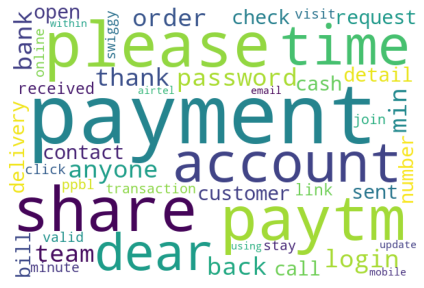

In [ ]:
# topic 0
draw_word_cloud(0) # online shopping

**Online shopping messages. Swiggy/paytim/online/payment are the best words which describe this cluster**

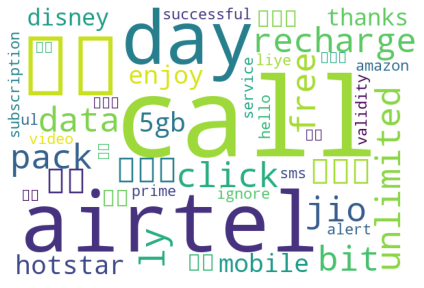

In [ ]:
draw_word_cloud(1) # directed promo

**These messages are directed promotional messages. Company providers send these messages to their user base only. This can be seen in announcing new mobile plans by a provider (like airtel) having unlimited packs, recharge packs etc. These also have words in the regional languages. Observe how 'liye' (hindi word) is in the cluster also!**

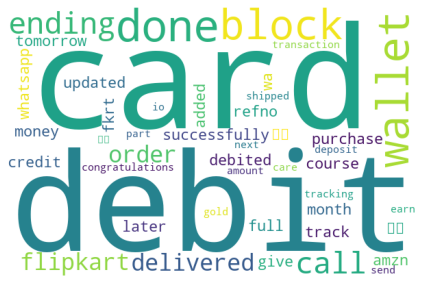

In [ ]:
draw_word_cloud(2) # card detail

**Card detail messages. Contain messages like blocking the card also. At times we have common messages like 'your card ending with ... or '(transaction) done'**



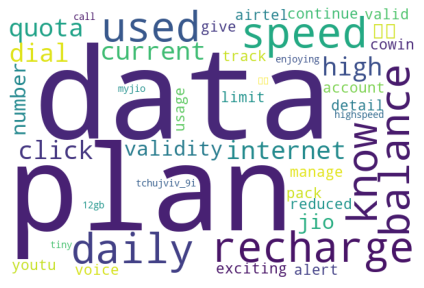

In [ ]:
draw_word_cloud(3) # validity end recharge

**This is interesting! It looks like these are those messages which are sent when a current plan is about to end. Clearly, there are more instances of the data pack getting over than the normal calling plan. Words like validity/recharge/current plan/alert/quota support our claims**

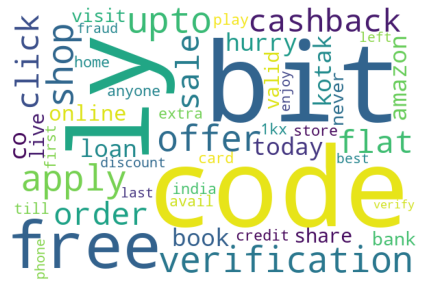

In [ ]:
draw_word_cloud(4) # undirected hyperlink

**These are undirected promotional messages with hyperlinks. The messages are not directed to a customer profile, but sent to masses. bit.ly is definitely the most common thing here, as used in messages. OTher words like offer/sale/online/flat point in the same direction. Hopefully some people fall for these! (assuming I am the sender)**


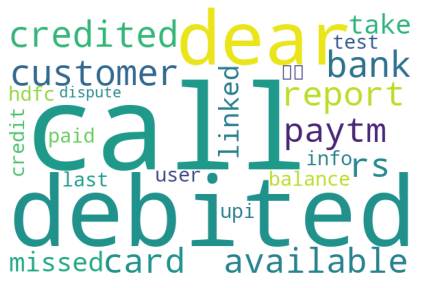

In [ ]:
draw_word_cloud(5) # bank messages after transaction

**Is the most sensitive cluster. Has got passwords, bank codes, debited, credited information etc**

## It is amazing how clear LDA has been. The kernel makes use of Latent Semantic Analysis (LSA) also but it gives similar results. Infact, I learnt that LDA is way more popular

In [ ]:
len(lda_top)

100000

In [ ]:
data = data[['clean']]
data.head(2)

,clean
2446651,Join fight COVID-19 Contribute support need he...
2295774,experience superior indoor coverage Airtel Wi-...


In [ ]:
data.shape

(100000, 1)

In [ ]:
data[['Online_Shopping','Directed_Promo_Regional', 'Card_Details',
      'Validity_Recharge', 'Undirected_Promo', 'Urgent_Sensitive']] = None

In [ ]:
data.head(2)

,clean,Online_Shopping,Directed_Promo_Regional,Card_Details,Validity_Recharge,Undirected_Promo,Urgent_Sensitive
2446651,Join fight COVID-19 Contribute support need he...,None,None,None,None,None,None
2295774,experience superior indoor coverage Airtel Wi-...,None,None,None,None,None,None


In [ ]:
col_list = data.columns.to_list()

In [ ]:
# add our 'probabilities' in the df itself
# for i, val in enumerate(lda_top):
#     data.iloc[i, 1:] = val
# this cell showing wierd behavior. sometimes fast sometimes very very slow!
# I had to convert to numpy arrays and allot them to the dataframe. Wierd but okay for now

In [ ]:
i = 0
temp = []
for i in range(len(lda_top)):
#   jj = lda_top[i]
  temp.append(lda_top[i])

In [ ]:
data.shape, lda_top.shape

((100000, 7), (100000, 6))

In [ ]:
arr = np.asarray(temp)

In [ ]:
data.loc[:,1:] = arr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.



In [ ]:
data.head(2)

,clean,Online_Shopping,Directed_Promo_Regional,Card_Details,Validity_Recharge,Undirected_Promo,Urgent_Sensitive
2446651,Join fight COVID-19 Contribute support need he...,0.786475,0.042857,0.042432,0.042769,0.042417,0.043050
2295774,experience superior indoor coverage Airtel Wi-...,0.039971,0.662048,0.041359,0.039723,0.176658,0.040241


In [ ]:
# put the predicted category in a seperate column itself
data['Predicted_Category'] = None

In [ ]:
data.shape

(100000, 8)

In [ ]:
data.iloc[:,1:-1].values.argmax(axis = 1), len(data.iloc[:,1:-1].values.argmax(axis = 1))

(array([0, 1, 5, ..., 1, 5, 1]), 100000)

In [ ]:
cat = np.asarray(data.iloc[:,1:-1].values.argmax(axis = 1) + 1)
cat

array([1, 2, 6, ..., 2, 6, 2])

In [ ]:
data['Predicted_Category'] = cat

In [ ]:
data.head(2)

,clean,Online_Shopping,Directed_Promo_Regional,Card_Details,Validity_Recharge,Undirected_Promo,Urgent_Sensitive,Predicted_Category
2446651,Join fight COVID-19 Contribute support need he...,0.786475,0.042857,0.042432,0.042769,0.042417,0.043050,1
2295774,experience superior indoor coverage Airtel Wi-...,0.039971,0.662048,0.041359,0.039723,0.176658,0.040241,2


In [ ]:
cat_name = []
for i in range(data.shape[0]):
    cat_name.append(data.iloc[i,-1])

In [ ]:
cat_name_np = np.asarray([col_list[i] for i in cat_name])
cat_name_np

array(['Online_Shopping', 'Directed_Promo_Regional', 'Urgent_Sensitive',
       ..., 'Directed_Promo_Regional', 'Urgent_Sensitive',
       'Directed_Promo_Regional'], dtype='<U23')

In [ ]:
data['Predicted_Category_Name'] = cat_name_np

In [ ]:
data['Predicted_Category_Name'].value_counts()

Online_Shopping            25770
Undirected_Promo           21980
Urgent_Sensitive           18385
Directed_Promo_Regional    16213
Validity_Recharge          11117
Card_Details                6535
Name: Predicted_Category_Name, dtype: int64

**the value_counts show which category of messages is received the most. Not unexpected though. Card details (sensitive messages) have the least number of messages, while online shopping and undirected promotions (but can be spammed by the sender big company) have the highest count.** <br>
**This also serves as a nice sanity check that our work is fine and realistic**

In [ ]:
# the value_counts show which category of messages is received the most. Not unexpected though

# Further methods of analysis possible
- Do time-series analysis on the data. Check for interesting trends. One way that I can think of is trying to predict which 'type' of message will be received/sent in the coming time. We can extend the idea to predict the customer behaviour: when does he/she do a transaction, when do their data packs usually get over. This can lead to targeted marketing!
- Try to find pretrained models and then perform sentiment analysis. I am sure there exist such models, especially for financial data like ours